<a href="https://colab.research.google.com/github/Edenshmuel/PapaJohns_Data_Science_Project/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
# הדפסת כל הקבצים בתיקייה (שימי את הנתיב האמיתי כאן)
folder_path = '/content/drive/MyDrive/Final_Progect_PapaJohns'
files = os.listdir(folder_path)
print(files)

['אפריל-אוגוסט_2023.xlsx', 'ינואר-אפריל_2023.xlsx', 'ינואר-פברואר_2022.csv', 'פברואר-יוני_2022.csv', 'יוני-דצמבר_2022.csv', 'אוגוסט-דצמבר_2023.csv', 'Combined_Data2024.csv']


In [11]:
import os
import re
from collections import defaultdict

folder_path = '/content/drive/MyDrive/Final_Progect_PapaJohns/Files'
files = os.listdir(folder_path)

# מילון שיקבץ קבצים לפי שנה
files_by_year = defaultdict(list)

# ניתוח כל שם קובץ
for file in files:
    # חיפוש של רצף מספרים של 4 ספרות (שנה)
    match = re.search(r'20\d{2}', file)
    if match:
        year = match.group()
        files_by_year[year].append(file)
    else:
        files_by_year['לא זוהתה שנה'].append(file)

# הדפסה של התוצאה
for year, file_list in files_by_year.items():
    print(f"שנה: {year}")
    for f in file_list:
        print(f"  - {f}")

שנה: 2023
  - אפריל-אוגוסט_2023.xlsx
  - ינואר-אפריל_2023.xlsx
  - אוגוסט-דצמבר_2023.csv
שנה: 2022
  - ינואר-פברואר_2022.csv
  - פברואר-יוני_2022.csv
  - יוני-דצמבר_2022.csv
שנה: 2024
  - Combined_Data2024.csv


In [13]:
import os
import re
import pandas as pd
from collections import defaultdict

# נתיב לקבצים
input_folder = '/content/drive/MyDrive/Final_Progect_PapaJohns/Files'
output_folder = '/content/drive/MyDrive/Final_Progect_PapaJohns'

files = os.listdir(input_folder)

# קיבוץ לפי שנה
files_by_year = defaultdict(list)
for file in files:
    match = re.search(r'20\d{2}', file)
    if match:
        year = match.group()
        files_by_year[year].append(file)

# איחוד לפי שנה
for year, file_list in files_by_year.items():
    df_list = []
    for file in file_list:
        file_path = os.path.join(input_folder, file)
        try:
            if file.endswith('.csv'):
                try:
                    df = pd.read_csv(file_path)
                except UnicodeDecodeError:
                    df = pd.read_csv(file_path, encoding='cp1255')
            elif file.endswith('.xlsx'):
                df = pd.read_excel(file_path)
            else:
                print(f'⚠️ Unsupported file: {file}')
                continue
            df_list.append(df)
        except Exception as e:
            print(f'Error reading {file}: {e}')

    # איחוד ושמירה
    if df_list:
        combined_df = pd.concat(df_list, ignore_index=True)
        output_path = os.path.join(output_folder, f'{year}_combined.csv')
        combined_df.to_csv(output_path, index=False)
        print(f'✅ Combined file saved for {year}: {output_path}')
    else:
        print(f'⚠️ No data to combine for {year}')

Error reading אוגוסט-דצמבר_2023.csv: 'charmap' codec can't decode byte 0x81 in position 613: character maps to <undefined>


<ipython-input-13-e5399a5b4b0d>:28: DtypeWarning: Columns (1,4,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


✅ Combined file saved for 2023: /content/drive/MyDrive/Final_Progect_PapaJohns/2023_combined.csv
Error reading ינואר-פברואר_2022.csv: 'charmap' codec can't decode byte 0x81 in position 613: character maps to <undefined>
Error reading פברואר-יוני_2022.csv: 'charmap' codec can't decode byte 0x81 in position 613: character maps to <undefined>
Error reading יוני-דצמבר_2022.csv: 'charmap' codec can't decode byte 0x81 in position 613: character maps to <undefined>
⚠️ No data to combine for 2022


<ipython-input-13-e5399a5b4b0d>:28: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-13-e5399a5b4b0d>:28: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


✅ Combined file saved for 2024: /content/drive/MyDrive/Final_Progect_PapaJohns/2024_combined.csv


In [16]:
import os
import pandas as pd

# נתיב לתיקייה שבה הקבצים של 2022
folder_2022 = '/content/drive/MyDrive/Final_Progect_PapaJohns/Files'

# רשימת קבצים של 2022
files_2022 = [f for f in os.listdir(folder_2022) if '2022' in f]

df_list_2022 = []

for file in files_2022:
    file_path = os.path.join(folder_2022, file)
    try:
        if file.endswith('.csv'):
            try:
                # ניסיון ראשון
                df = pd.read_csv(file_path)
            except Exception:
                # ניסיון שני עם קידוד עברי
                df = pd.read_csv(file_path, encoding='cp1255')
        elif file.endswith('.xlsx'):
            df = pd.read_excel(file_path)
        else:
            print(f"⚠️ קובץ לא נתמך: {file}")
            continue

        df_list_2022.append(df)

    except Exception as e:
        print(f"❌ שגיאה בקריאת הקובץ {file}: {e}")

# איחוד ושמירה אם הכל תקין
if df_list_2022:
    combined_2022 = pd.concat(df_list_2022, ignore_index=True)
    output_path = '/content/drive/MyDrive/Final_Progect_PapaJohns/2022_combined.csv'
    combined_2022.to_csv(output_path, index=False)
    print(f"✅ קובץ מאוחד ל־2022 נשמר בהצלחה: {output_path}")
else:
    print("⚠️ לא נמצאו נתונים לאיחוד לשנת 2022")


❌ שגיאה בקריאת הקובץ ינואר-פברואר_2022.csv: 'charmap' codec can't decode byte 0x81 in position 613: character maps to <undefined>
❌ שגיאה בקריאת הקובץ פברואר-יוני_2022.csv: 'charmap' codec can't decode byte 0x81 in position 613: character maps to <undefined>
❌ שגיאה בקריאת הקובץ יוני-דצמבר_2022.csv: 'charmap' codec can't decode byte 0x81 in position 613: character maps to <undefined>
⚠️ לא נמצאו נתונים לאיחוד לשנת 2022


In [15]:
import pandas as pd

base_path = '/content/drive/MyDrive/Final_Progect_PapaJohns'

# הצגת קובץ 2022
df_2022 = pd.read_csv(f'{base_path}/2022_combined.csv')
print("📅 קובץ 2022:")
display(df_2022.head())

# הצגת קובץ 2023
df_2023 = pd.read_csv(f'{base_path}/2023_combined.csv')
print("📅 קובץ 2023:")
display(df_2023.head())

# הצגת קובץ 2024
df_2024 = pd.read_csv(f'{base_path}/2024_combined.csv')
print("📅 קובץ 2024:")
display(df_2024.head())

📅 קובץ 2022:


,??? ????,???? ????,????,????.1,???? ???,???? ?????,???? ???.1,%
0,4,"?????? 14 ()""",15,0.0,1287.5,87.9,1100.43,0.42
1,4,"(?) ?????? 14 ()""",12,0.0,0.0,87.9,0.00,0.00
2,5,"????? 14 ()""",17,0.0,1459.3,87.9,1247.26,0.47
3,5,"(?) ????? 14 ()""",5,0.0,0.0,87.9,0.00,0.00
4,7,"??????? 14 ()""",12,0.0,1030.8,92.9,881.03,0.33


📅 קובץ 2023:


<ipython-input-15-9177c5279268>:11: DtypeWarning: Columns (1,2,4,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv(f'{base_path}/2023_combined.csv')


,תאריך,מ -,2023-04-01 00:00:00,עד,2023-08-01 00:00:00,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,2023-01-01 00:00:00,2023-04-01 00:00:00.1,2023-08-01 00:00:00.1,2023-01-01 00:00:00.1
0,סוג פריט,מ -,0,עד,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,מס' פריט,מ -,0,עד,99999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,תאריך,הזמנה,סוג פריט,תאור סוג,מס' פריט,תאור פריט,כמות,סכום,הנחה לפריט,אחרי הנחה,NaN,NaN,NaN,NaN
3,2023-04-01 00:00:00,7609998,9,פיצות מיוחדות 14',135,פטריות,1,4.95,0,4.95,NaN,NaN,NaN,NaN
4,2023-04-01 00:00:00,7609998,9,פיצות מיוחדות 14',631,ארטישוק,1,4.95,0,4.95,NaN,NaN,NaN,NaN


📅 קובץ 2024:


<ipython-input-15-9177c5279268>:16: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv(f'{base_path}/2024_combined.csv')


,Month,תאריך,סוג פריט,תאור סוג,מס' פריט,תאור פריט,הזמנה,כמות,סכום,הנחה לפריט,אחרי הנחה
0,"January, 2024",01/01/2024,1,פיצות מיוחדות 14',4,ביאנקה 14' [],7636270,1,0.0,0,0.0
1,"January, 2024",01/01/2024,1,פיצות מיוחדות 14',4,ביאנקה 14' [],7636327,1,85.9,0,85.9
2,"January, 2024",01/01/2024,1,פיצות מיוחדות 14',5,טוליפ 14' [],7636270,1,0.0,0,0.0
3,"January, 2024",01/01/2024,1,פיצות מיוחדות 14',92,פפרוני ספיישל בצק דק 14' [],7636281,1,0.0,0,0.0
4,"January, 2024",01/01/2024,1,פיצות מיוחדות 14',93,קריביאן בצק דק 14' [],7636289,1,0.0,0,0.0


In [ ]:
# הצגת סוג הנתונים וכמות הערכים החסרים בכל עמודה
missing_data = df_2024.isnull().sum()  # ספירת ערכים חסרים
data_types = df_2024.dtypes  # סוגי הנתונים

# איחוד המידע למסגרת נתונים אחת לנוחות התצוגה
data_summary = pd.DataFrame({
    'Data Type': data_types,
    'Missing Values': missing_data,
    'Percentage Missing': (missing_data / len(df_2024)) * 100
})

# הצגת המידע
data_summary

,Data Type,Missing Values,Percentage Missing
Month,object,0,0.000000
תאריך,object,0,0.000000
סוג פריט,object,0,0.000000
תאור סוג,object,11868,8.196642
מס' פריט,object,0,0.000000
תאור פריט,object,816,0.563571
הזמנה,int64,0,0.000000
כמות,int64,0,0.000000
סכום,float64,0,0.000000
הנחה לפריט,int64,0,0.000000


In [ ]:
# Converting the date column to datetime format and extracting useful features
df_2024['תאריך'] = pd.to_datetime(df_2024['תאריך'], dayfirst=True)  # Ensure date format is correct
df_2024['Day_of_Week'] = df_2024['תאריך'].dt.day_name()  # Extract day of the week
df_2024['Month_Name'] = df_2024['תאריך'].dt.month_name()  # Extract month name
df_2024['Week_of_Year'] = df_2024['תאריך'].dt.isocalendar().week  # Week of the year

In [ ]:
df_2024

,Month,תאריך,סוג פריט,תאור סוג,מס' פריט,תאור פריט,הזמנה,כמות,סכום,הנחה לפריט,אחרי הנחה,Day_of_Week,Month_Name,Week_of_Year
0,"January, 2024",2024-01-01,1,פיצות מיוחדות 14',4,ביאנקה 14' [],7636270,1,0.0,0,0.0,Monday,January,1
1,"January, 2024",2024-01-01,1,פיצות מיוחדות 14',4,ביאנקה 14' [],7636327,1,85.9,0,85.9,Monday,January,1
2,"January, 2024",2024-01-01,1,פיצות מיוחדות 14',5,טוליפ 14' [],7636270,1,0.0,0,0.0,Monday,January,1
3,"January, 2024",2024-01-01,1,פיצות מיוחדות 14',92,פפרוני ספיישל בצק דק 14' [],7636281,1,0.0,0,0.0,Monday,January,1
4,"January, 2024",2024-01-01,1,פיצות מיוחדות 14',93,קריביאן בצק דק 14' [],7636289,1,0.0,0,0.0,Monday,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144786,"December, 2024",2025-01-01,13,פיצות מיוחדות 14',20,קלאסית 14' [],7669629,1,102.8,0,102.8,Wednesday,January,1
144787,"December, 2024",2025-01-01,13,פיצות מיוחדות 14',20,קלאסית 14' [],7669630,1,0.0,0,0.0,Wednesday,January,1
144788,"December, 2024",2025-01-01,13,פיצות מיוחדות 14',39,מרגריטה 8' [],7669631,1,34.9,0,34.9,Wednesday,January,1
144789,"December, 2024",2025-01-01,14,NaN,283,היוונית,7669629,1,0.0,0,0.0,Wednesday,January,1


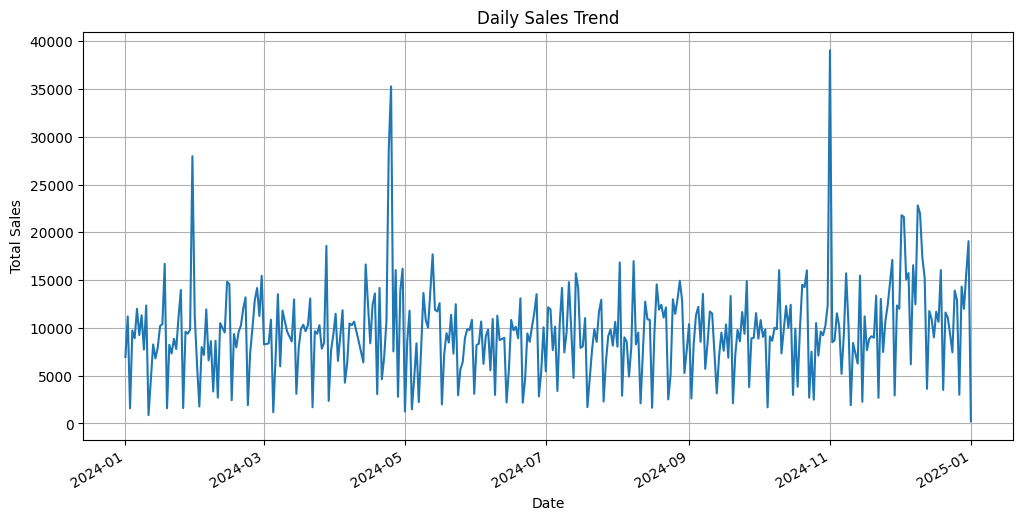

In [ ]:
import matplotlib.pyplot as plt

# Grouping data by date and summing the sales
daily_sales = df_2024.groupby('תאריך')['אחרי הנחה'].sum()

# Plotting the trend over time
plt.figure(figsize=(12,6))
daily_sales.plot(kind='line')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

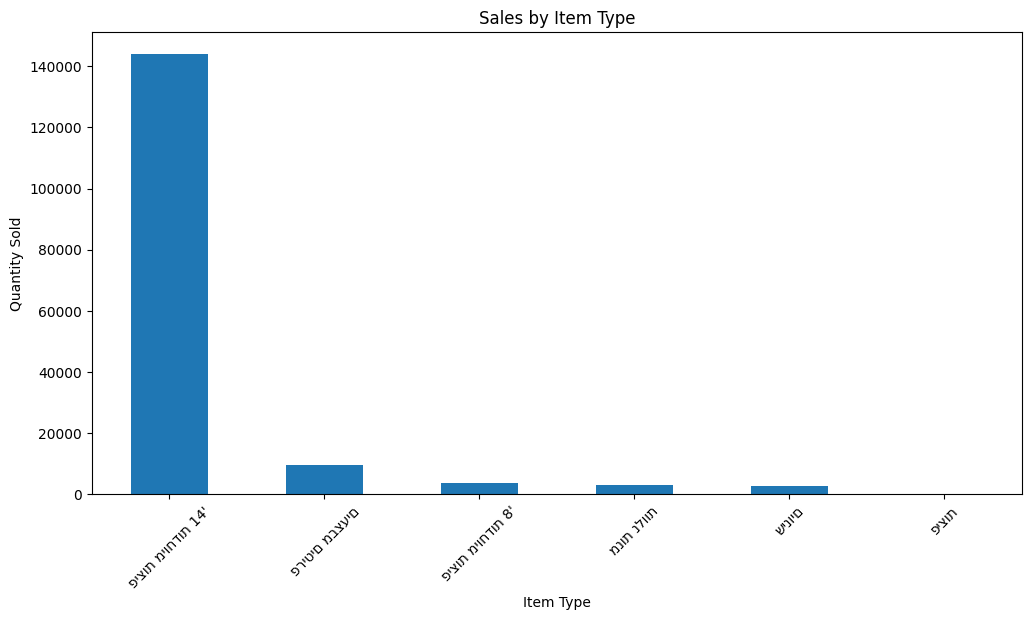

In [ ]:
# Grouping by item type and summing quantities sold
item_sales = df_2024.groupby('תאור סוג')['כמות'].sum().sort_values(ascending=False)

# Plotting the top item categories
plt.figure(figsize=(12,6))
item_sales.plot(kind='bar')
plt.title('Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

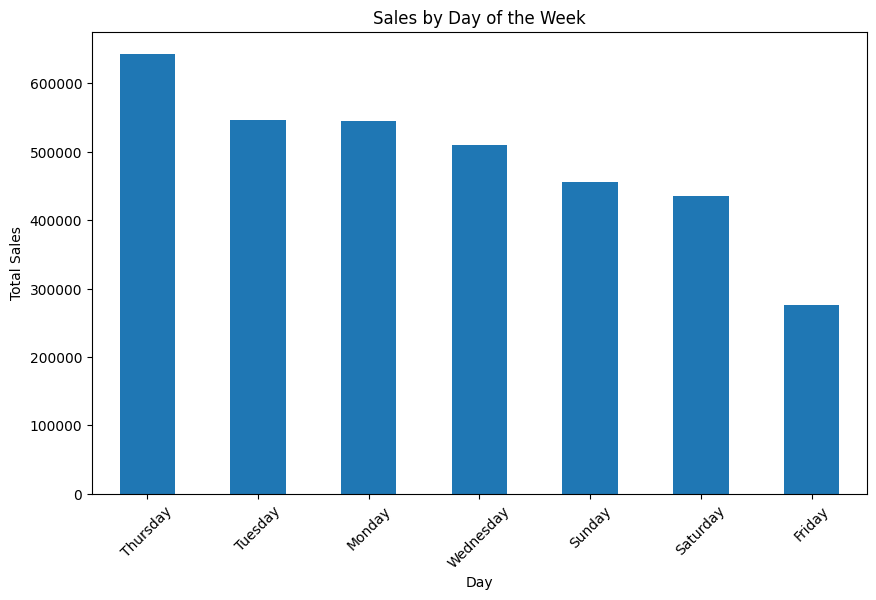

In [ ]:
# Grouping by day of the week and summing sales
day_sales = df_2024.groupby('Day_of_Week')['אחרי הנחה'].sum().sort_values(ascending=False)

# Plotting sales by day of the week
plt.figure(figsize=(10,6))
day_sales.plot(kind='bar')
plt.title('Sales by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

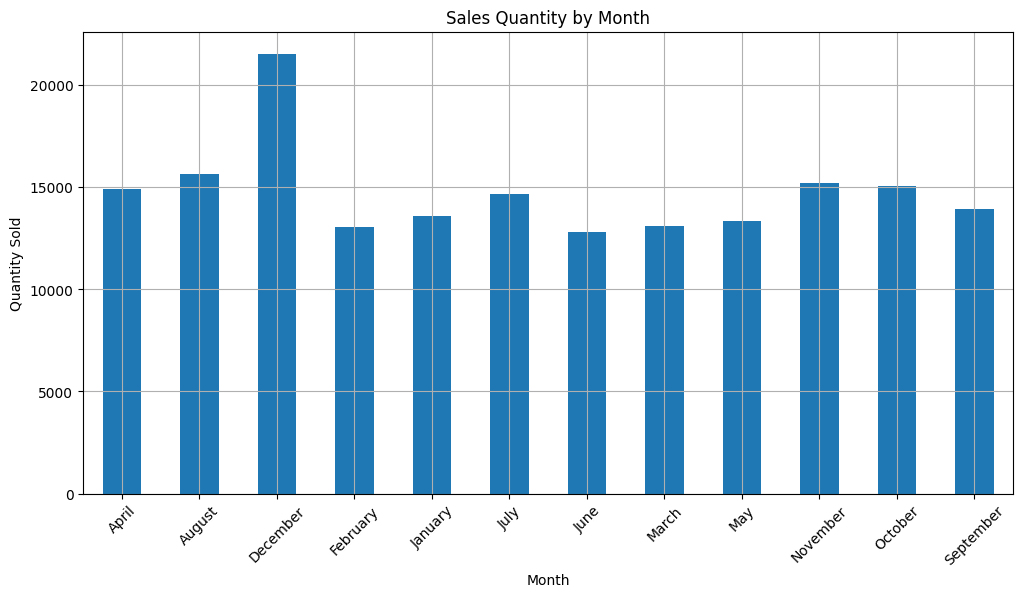

In [ ]:
import matplotlib.pyplot as plt

# Grouping by month and summing the quantity sold
monthly_sales = df_grouped.groupby(df_grouped['תאריך'].dt.month_name())['כמות'].sum().sort_index()

# Plotting the sales by month
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='bar')
plt.title('Sales Quantity by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Grouping by 'הזמנה' and aggregating the items ordered in each order
# Combining the item descriptions into a single string for each order
df_grouped = df_2024.groupby('הזמנה').agg({
    'תאריך': 'first',  # Keeping the first date for each order
    'תאור סוג': lambda x: ', '.join(x.dropna().unique()),  # Combining unique item types into a string
    'תאור פריט': lambda x: ', '.join(x.dropna().unique()), # Combining unique item descriptions
    'כמות': 'sum',  # Summing quantities for each order
    'סכום': 'sum',  # Summing the total amount for each order
    'הנחה לפריט': 'sum',  # Summing the total discount
    'אחרי הנחה': 'sum'  # Summing the total amount after discount
}).reset_index()

# Display the grouped data
df_grouped.head()

,הזמנה,תאריך,תאור סוג,תאור פריט,כמות,סכום,הנחה לפריט,אחרי הנחה
0,7636259,2024-01-01,פיצות מיוחדות 14',מרגריטה 8' [],1,30.90,0,30.90
1,7636260,2024-01-01,פיצות מיוחדות 8',"זיתים ירוקים חצי ימין, פאפא קראסט קלאסי 14' []",2,88.85,0,88.85
2,7636261,2024-01-01,"פיצות מיוחדות 14', פריטים מבצעים","תירס, תוספת גבינה, עגבניות, ארוחת ילדים, קלאסי...",8,59.00,0,59.00
3,7636262,2024-01-01,פיצות מיוחדות 14',קלאסית 8' [],1,30.90,0,30.90
4,7636263,2024-01-01,פיצות מיוחדות 14',"פיוז טי אפרסק 1.5 ליטר, קלאסית 16' []",2,97.70,0,97.70


In [ ]:
# Converting the date column to datetime format and extracting useful features
df_grouped['תאריך'] = pd.to_datetime(df_grouped['תאריך'], dayfirst=True)  # Ensure date format is correct
df_grouped['Day_of_Week'] = df_grouped['תאריך'].dt.day_name()  # Extract day of the week
df_grouped['Month_Name'] = df_grouped['תאריך'].dt.month_name()  # Extract month name
df_grouped['Week_of_Year'] = df_grouped['תאריך'].dt.isocalendar().week  # Week of the year

In [ ]:
df_grouped

,הזמנה,תאריך,תאור סוג,תאור פריט,כמות,סכום,הנחה לפריט,אחרי הנחה
0,7636259,2024-01-01,פיצות מיוחדות 14',מרגריטה 8' [],1,30.90,0,30.90
1,7636260,2024-01-01,פיצות מיוחדות 8',"זיתים ירוקים חצי ימין, פאפא קראסט קלאסי 14' []",2,88.85,0,88.85
2,7636261,2024-01-01,"פיצות מיוחדות 14', פריטים מבצעים","תירס, תוספת גבינה, עגבניות, ארוחת ילדים, קלאסי...",8,59.00,0,59.00
3,7636262,2024-01-01,פיצות מיוחדות 14',קלאסית 8' [],1,30.90,0,30.90
4,7636263,2024-01-01,פיצות מיוחדות 14',"פיוז טי אפרסק 1.5 ליטר, קלאסית 16' []",2,97.70,0,97.70
...,...,...,...,...,...,...,...,...
32741,7669629,2025-01-01,פיצות מיוחדות 14',"רוטב שום פרמזן גדול, ללא משולשים, פיצות מיוחדו...",6,112.70,0,112.70
32742,7669630,2025-01-01,"פיצות מיוחדות 14', פריטים מבצעים","קוקה קולה 1.5 ליטר, שקית לקוח, פטריות, קלאסית ...",6,85.35,0,85.35
32743,7669631,2025-01-01,פיצות מיוחדות 14',"ללא משולשים, מרגריטה 8' []",3,34.90,0,34.90
32744,7669632,2024-12-31,,"קלאסית 14'+ תוס BM, פיצה אישית + תוס XTRA, קל...",45,4013.20,0,4013.20


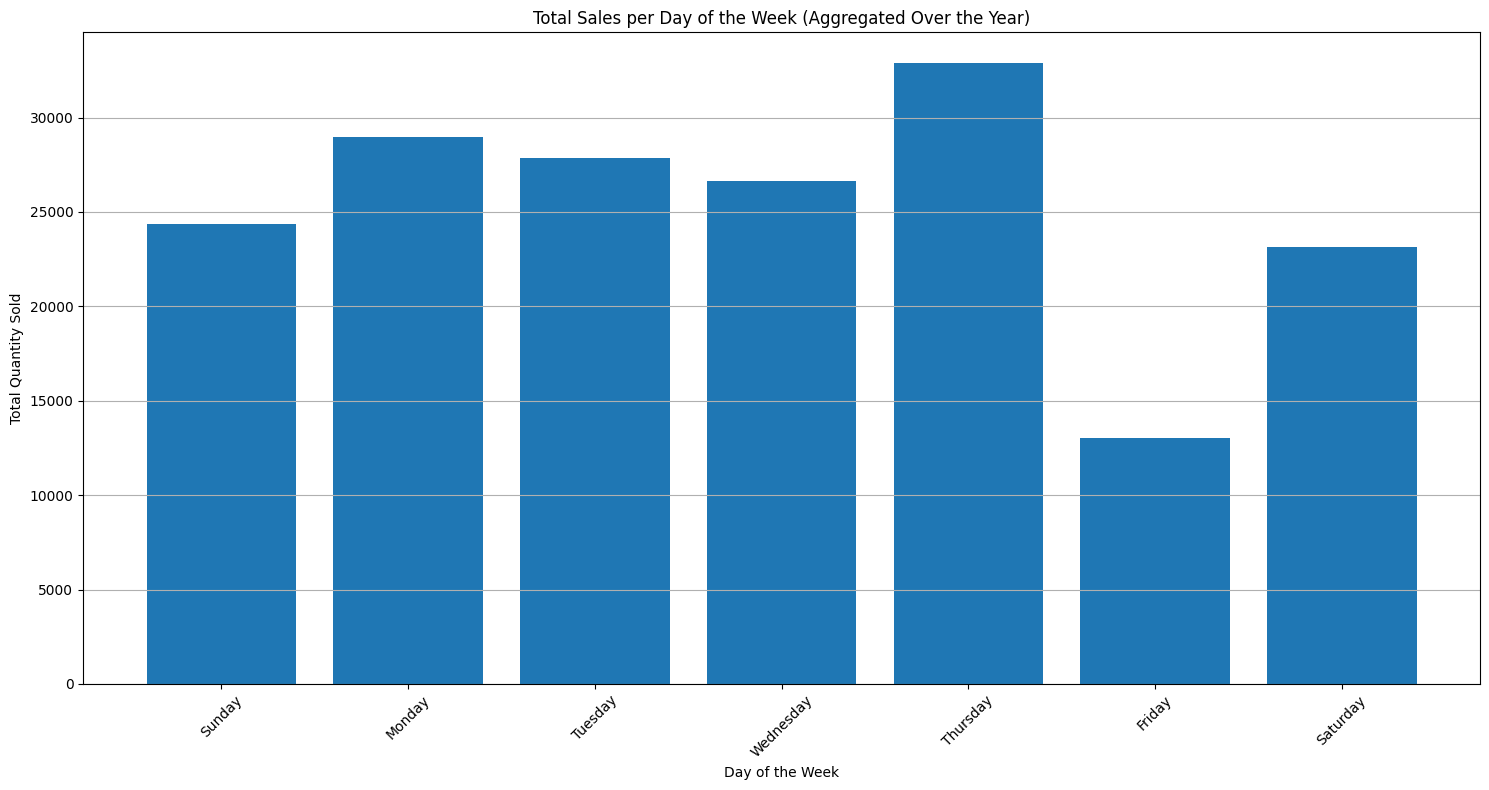

In [ ]:
import matplotlib.pyplot as plt

# Ensure the date column is in datetime format and extract the day of the week
df_grouped['Day_of_Week'] = df_grouped['תאריך'].dt.day_name()

# Defining the order of the days of the week for proper sorting
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Grouping sales data by day of the week and summing across the entire year
weekly_aggregate_sales = df_grouped.groupby('Day_of_Week')['כמות'].sum().reindex(day_order)

# Plotting the total sales for each day of the week aggregated over the year
plt.figure(figsize=(15, 8))
plt.bar(weekly_aggregate_sales.index, weekly_aggregate_sales.values)

# Customizing the plot
plt.title('Total Sales per Day of the Week (Aggregated Over the Year)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (12).

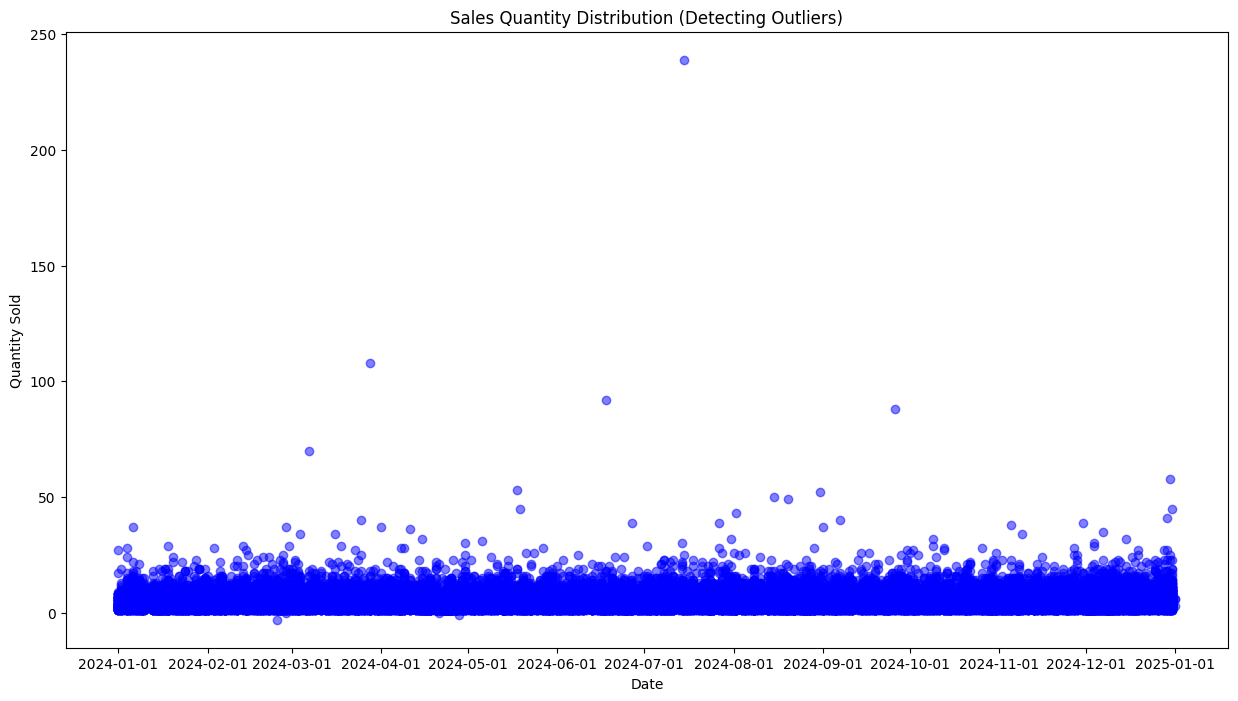

In [ ]:
import matplotlib.pyplot as plt

# Sorting data by date to ensure chronological order
df_grouped = df_grouped.sort_values('תאריך')

# Scatter plot to visualize outliers in sales quantity per order
plt.figure(figsize=(15, 8))
plt.scatter(df_grouped['תאריך'], df_grouped['כמות'], alpha=0.5, c='blue')

# Customizing the plot to show all months on X-axis
plt.title('Sales Quantity Distribution (Detecting Outliers)')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')

# Setting the ticks for all months
plt.xticks(df_grouped['תאריך'].dt.to_period("M").drop_duplicates().dt.start_time,
           df_grouped['תאריך'].dt.strftime('%B').unique(), rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


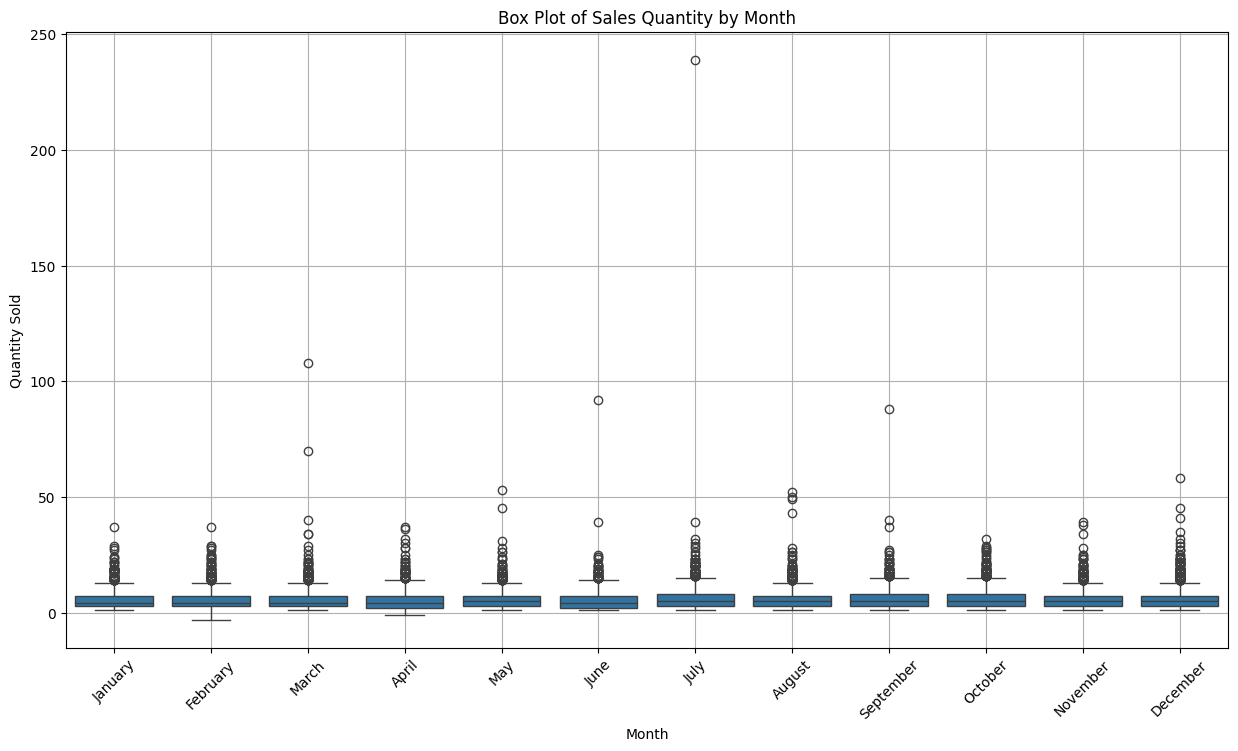

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for sales quantity per month
plt.figure(figsize=(15, 8))
sns.boxplot(x='Month_Name', y='כמות', data=df_grouped, order=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

# Customizing the plot
plt.title('Box Plot of Sales Quantity by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating a pivot table where rows are months and columns are days of the week
monthly_weekly_sales = df_grouped.pivot_table(
    values='כמות',
    index=df_grouped['תאריך'].dt.month_name(),
    columns=df_grouped['תאריך'].dt.day_name(),
    aggfunc='sum',
    fill_value=0
)

In [ ]:
# Defining the correct order for months and days of the week
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Reindexing to ensure all months and days are included, even if data is missing
monthly_weekly_sales = monthly_weekly_sales.reindex(index=month_order, columns=day_order, fill_value=0)
monthly_weekly_sales

תאריך,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
תאריך,,,,,,,
January,1763,2374,2287,2432,2066,642,2023
February,1940,1741,2134,2460,2650,749,1392
March,1903,2224,881,1731,2752,1240,2374
April,1654,2764,2676,2186,3046,701,1907
May,1177,2356,1790,2049,3087,1569,1302
June,2196,2118,1838,1594,2355,679,2016
July,2409,2895,2464,2608,2425,780,1083
August,2086,1792,2221,2452,3266,1847,1984
September,2389,2126,2266,2080,2128,889,2073


In [ ]:
# Reset the index to move months from the index to a column
monthly_weekly_sales = monthly_weekly_sales.reset_index()

# Rename the new column (if needed)
monthly_weekly_sales.rename(columns={'index': 'Month'}, inplace=True)

# Perform one-hot encoding for the 'תאריך' column
monthly_weekly_sales = pd.get_dummies(monthly_weekly_sales, columns=['תאריך'], prefix='', prefix_sep='')

# Display the updated table
monthly_weekly_sales

KeyError: "None of [Index(['תאריך'], dtype='object')] are in the [columns]"

In [ ]:
# רשימת שמות החודשים לפי סדר
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# שינוי האינדקס לשמות החודשים
monthly_weekly_sales.index = month_order

# בדיקה אם הכל תקין
monthly_weekly_sales # לראות שהתוצאה נכונה

,Month,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,April,August,December,February,January,July,June,March,May,November,October,September
January,0,1763,2374,2287,2432,2066,642,2023,False,False,False,False,True,False,False,False,False,False,False,False
February,1,1940,1741,2134,2460,2650,749,1392,False,False,False,True,False,False,False,False,False,False,False,False
March,2,1903,2224,881,1731,2752,1240,2374,False,False,False,False,False,False,False,True,False,False,False,False
April,3,1654,2764,2676,2186,3046,701,1907,True,False,False,False,False,False,False,False,False,False,False,False
May,4,1177,2356,1790,2049,3087,1569,1302,False,False,False,False,False,False,False,False,True,False,False,False
June,5,2196,2118,1838,1594,2355,679,2016,False,False,False,False,False,False,True,False,False,False,False,False
July,6,2409,2895,2464,2608,2425,780,1083,False,False,False,False,False,True,False,False,False,False,False,False
August,7,2086,1792,2221,2452,3266,1847,1984,False,True,False,False,False,False,False,False,False,False,False,False
September,8,2389,2126,2266,2080,2128,889,2073,False,False,False,False,False,False,False,False,False,False,False,True
October,9,2299,2376,3122,1963,2973,1167,1150,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
correlation_matrix = monthly_weekly_sales.corr()

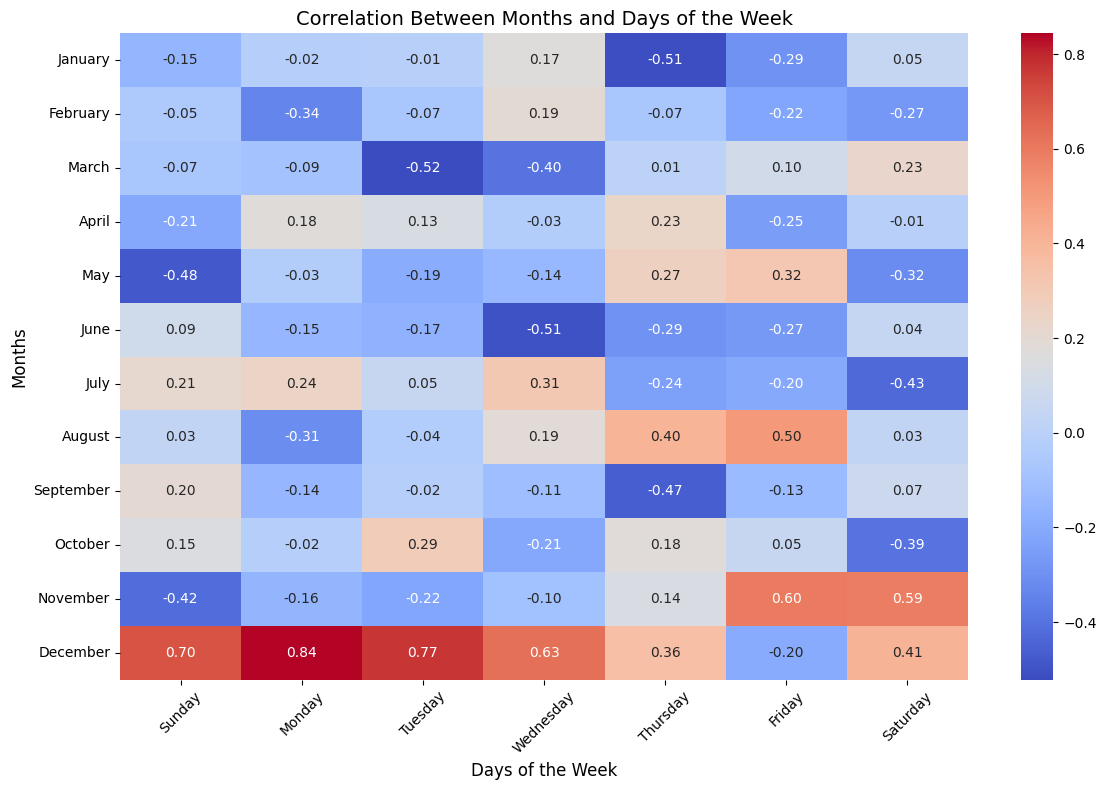

In [ ]:
# Define the columns for days of the week (Sunday to Saturday)
day_columns = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix.loc[['January', 'February', 'March', 'April', 'May', 'June',
                            'July', 'August', 'September', 'October', 'November', 'December'], day_columns],  # Ensure correct slicing
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    cbar=True
)

# Add titles and labels
plt.title('Correlation Between Months and Days of the Week', fontsize=14)
plt.xlabel('Days of the Week', fontsize=12)
plt.ylabel('Months', fontsize=12)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()